# Evolution of actors careers post-blockbuster in the film industry
How does a significant box office success impact an actor's subsequent choices and overall career path ?

##  Context

Analyze career trajectories of actors following their roles in high-grossing films using the CMU Movie Dataset

More specifically, explore the following research questions: 
- Does a high-grossing film consistently lead to **continued box office success** for its actors in their subsequent films?
- Is there a noticeable **change in genre or type of characters** portrayed by actors after a significant hit?
- What are the long-term career impacts on actors who have starred in blockbuster hits?

In [1]:
# External imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Observational study

In [2]:
# Retrieve stored dataframes from previous notebook
%store -r balanced_df
%store -r df_prepared
%store -r matched_df

In [3]:
# Keep only the matched actors
balanced_actors = balanced_df['name_actor']
df_movies_balanced = df_prepared[df_prepared['name_actor'].isin(balanced_actors)]

In [4]:
df_movies_balanced.columns

Index(['wikiID', 'movieID', 'releaseDate', 'charactName', 'birth', 'gender',
       'height', 'ethnicity', 'name_actor', 'age', 'charActID', 'charID',
       'actID', 'name_movie', 'revenue', 'runtime', 'languages', 'countries',
       'genres', 'year', 'averageRating', 'success', 'big_hit_actor',
       'age_at_peak', 'year_of_peak', 'is_big_hit',
       'releaseDate_first_big_hit', 'movie_count', 'movie_count_before_hit'],
      dtype='object')

In [5]:
df_movies_balanced['releaseDate'].isna().sum()

0

Now, we want to compare the carrer longevity

In [6]:
# Convert releaseDate to DateTime
df_movies_balanced['releaseDate'] = pd.to_datetime(df_movies_balanced['releaseDate'], errors='coerce')

# Calculate Last and First Apparence
career_start = df_movies_balanced.groupby('name_actor')['releaseDate'].min()
career_end = df_movies_balanced.groupby('name_actor')['releaseDate'].max()

career_duration = (career_end - career_start).dt.days / 365.25  # Convert days to years
career_duration_df = career_duration.reset_index()
career_duration_df.rename(columns={'releaseDate': 'career_length_in_years'}, inplace=True)


C:\Users\diego\AppData\Local\Temp\ipykernel_2972\4040368507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_balanced['releaseDate'] = pd.to_datetime(df_movies_balanced['releaseDate'], errors='coerce')


In [7]:
carrer_longevity_df = pd.merge(df_movies_balanced, career_duration_df, on='name_actor')



In [8]:
# Analysis
treatment_group = carrer_longevity_df[carrer_longevity_df['big_hit_actor'] == True]
control_group = carrer_longevity_df[carrer_longevity_df['big_hit_actor'] == False]

mean_career_length_treatment = treatment_group['career_length_in_years'].mean()
mean_career_length_control = control_group['career_length_in_years'].mean()

print(f'The mean carrer longevity of actors that played in a big hit is: {mean_career_length_treatment} (treatement group)')
print(f'The mean carrer longevity of actors that did not play in a big hit is: {mean_career_length_control} (control group)')


The mean carrer longevity of actors that played in a big hit is: 17.97028240067632 (treatement group)
The mean carrer longevity of actors that did not play in a big hit is: 15.478342044995193 (control group)


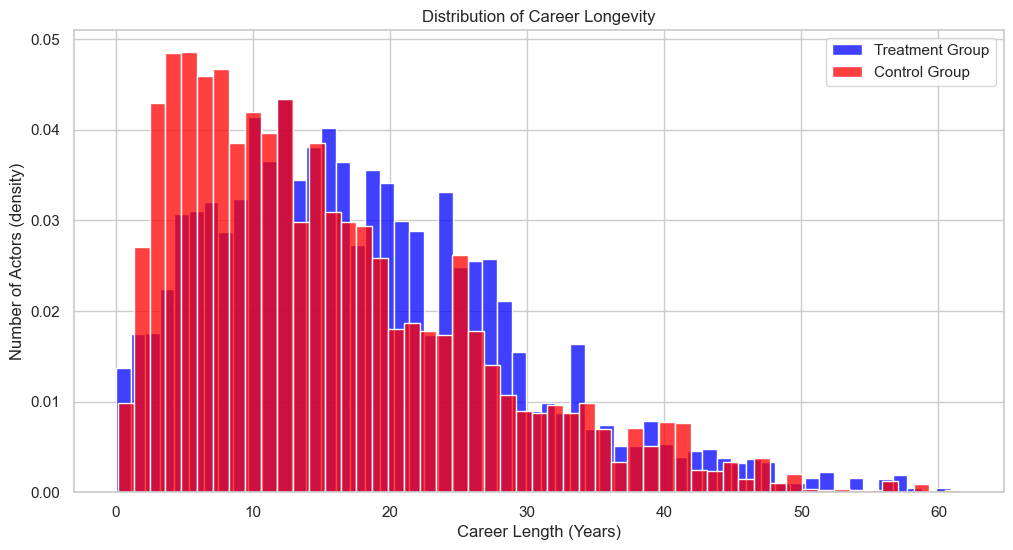

In [9]:
# Histogram

# Set the style
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(treatment_group['career_length_in_years'], color="blue", label='Treatment Group', stat='density')
sns.histplot(control_group['career_length_in_years'], color="red", label='Control Group', stat='density')

plt.title('Distribution of Career Longevity')
plt.xlabel('Career Length (Years)')
plt.ylabel('Number of Actors (density)')
plt.legend()
plt.show()

The control group appears to have more actors in the shorter career span categories (less than 10 years), whereas the treatment group has a more evenly distributed frequency across different career lengths. The treatment group has more actors with longer careers, indicated by the bars extending further to the right (beyond 30 years), compared to the control group. This suggests that actors who have been in a big hit may have longer-lasting careers.

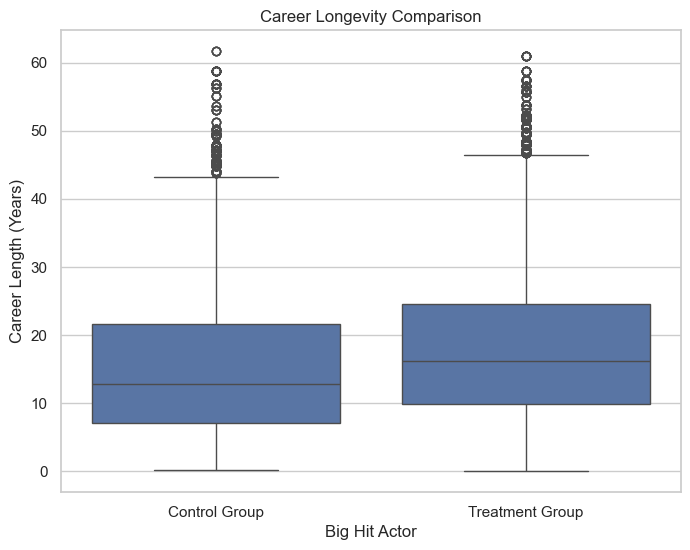

In [10]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='big_hit_actor', y='career_length_in_years', data=carrer_longevity_df)
plt.title('Career Longevity Comparison')
plt.xlabel('Big Hit Actor')
plt.ylabel('Career Length (Years)')
plt.xticks([0, 1], ['Control Group', 'Treatment Group'])
plt.show()

Comparing the two boxes, we can see that not only is the median of the treatment group higher (indicating longer average career lengths), but the box and whiskers are also generally higher on the scale. This implies that actors in the treatment group not only have a tendency towards longer careers on average but also include more actors with very long careers.

Next, we will look to the number of unique movieIDs associated with each actor to see if actors in big hits tend to appear in more movies overall

In [11]:

# Calculate the average number of movies for the treatment group
average_movies_treatment = treatment_group['movie_count'].mean()

# Calculate the average number of movies for the control group
average_movies_control = control_group['movie_count'].mean()

print(f'Average number of movies for actors in big hits: {average_movies_treatment}')
print(f'Average number of movies for actors not in big hits: {average_movies_control}')


Average number of movies for actors in big hits: 11.508476271440717
Average number of movies for actors not in big hits: 7.1229529170931425


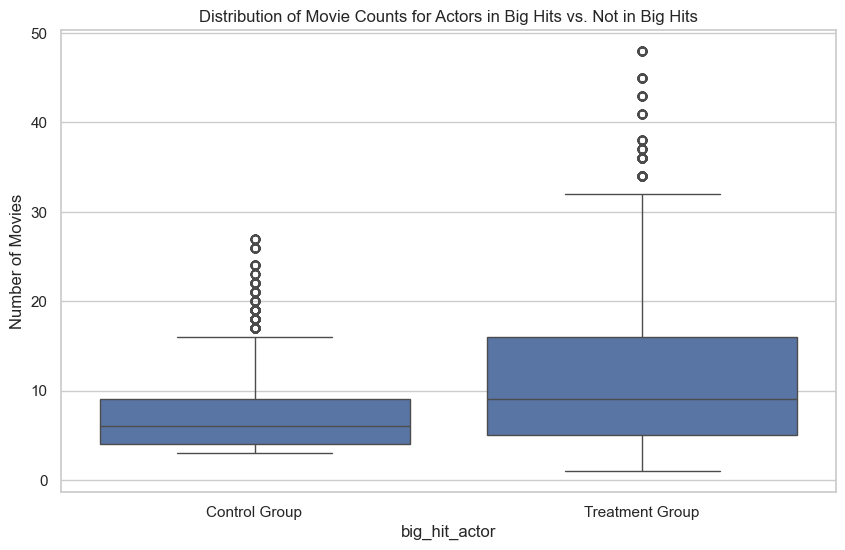

In [12]:
averages = [average_movies_control, average_movies_treatment]
group_names = ['Control Group', 'Treatment Group']

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='big_hit_actor', y='movie_count', data=carrer_longevity_df)
plt.xticks([0, 1], ['Control Group', 'Treatment Group'])
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Counts for Actors in Big Hits vs. Not in Big Hits')
plt.show()

The treatment group's median is higher than the control group's median, indicating that actors who have played in big hits tend to appear in more movies. 

The treatment group's upper whisker extends farther than the control group's, suggesting that some actors in the treatment group have appeared in a very high number of movies

The treatment group not only has a higher median but also a wider range of movie counts, suggesting that being in a big hit could be associated with a larger number of movie appearances. However, the presence of outliers indicates that there are exceptions to this trend

We want how long it takes to achieve a big hit for the treatment group

In [13]:
career_start = carrer_longevity_df.groupby('name_actor')['releaseDate'].min().dt.year

career_start_df = career_start.reset_index()
career_start_df.columns = ['name_actor', 'career_start_year']

In [14]:
merged_df = pd.merge(carrer_longevity_df, career_start_df, on='name_actor')


In [15]:
merged_df['ethnicity'].isna().sum() / len(merged_df)

0.6016447276095316

In [16]:
treatment_group= merged_df[merged_df['big_hit_actor']==True]

treatment_group['time_to_first_big_hit'] = treatment_group['releaseDate_first_big_hit'].dt.year - treatment_group['career_start_year']

print(f"Time to achieve a big hit for a big hit actor: {treatment_group['time_to_first_big_hit'].mean()}")


Time to achieve a big hit for a big hit actor: 5.158273741061159


C:\Users\diego\AppData\Local\Temp\ipykernel_2972\1179288889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_group['time_to_first_big_hit'] = treatment_group['releaseDate_first_big_hit'].dt.year - treatment_group['career_start_year']


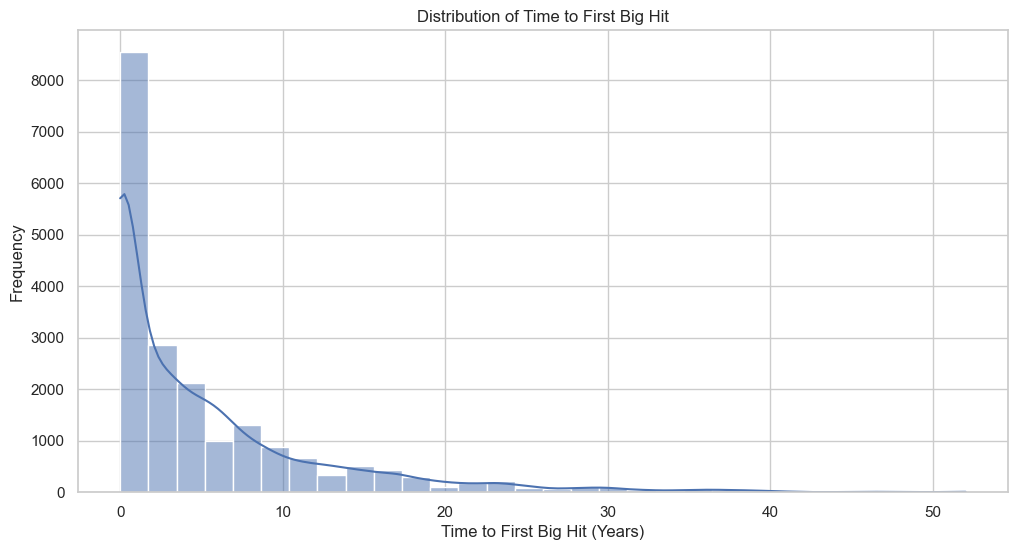

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of time to first big hit
plt.figure(figsize=(12, 6))
sns.histplot(treatment_group['time_to_first_big_hit'], bins=30, kde=True)
plt.title('Distribution of Time to First Big Hit')
plt.xlabel('Time to First Big Hit (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Career post-big-hit anaylsis

It is interesting to look at the evolution of the career of actors after their first big-hit to see if we can notice any change with their career pre-big-hit or with the career of an actor that did not play in a big hit. 

We want compare the before/after big-hit career of actors in the treatment group with the ones in the control group. To do so we have to define an event for the actors in the control group that will be used as reference to set the before/after career of those actors (since they did not play in any big hit movie). We decided to attribute a mock-up 'first big hit' to actors in the control group that corresponds to the movie number (ordered in chronological order) of first big hit of their respective matched treatment group actor. So for example, Lou Taylor Pucci is in the control group since he did not play in any big-hit movies, he was matched with Leonardo DiCaprio who is in the treatment group. Leonardo DiCaprio had his first big hit after playing in 4 movies, it's 5th movie was his first big-hit. Following this, we set the mock-up first big-hit of Lou Taylor Pucci to be his 5th movie. In a sense this 'nth' movie represents the most likely movie for the first big-hit of control group actors (if they had one).

First we want to use the matched dataframe to create a new column on our working dataframe. This column will contain, for each actor, the name of the actor that has been matched with them. 

In [18]:
# Keep only interesting columns for subsequent analysis
col = ['movieID', 'name_movie', 'releaseDate', 'genres',  'revenue', 'success', 'is_big_hit', 'name_actor',
       'birth', 'big_hit_actor', 'movie_count_before_hit']
df_career_analysis = df_movies_balanced[col].copy()

In [19]:
# Keep only name columns from the matched dataframe
matched_df = matched_df[['name_actor_control', 'name_actor_treat']]

# Create new column with the name of the matched actor (do this for treatment and control group):
# First populate our dataframe with the mached treatment actor names for the control group
df_career_analysis = pd.merge(df_career_analysis, matched_df, left_on='name_actor', right_on='name_actor_control', how='left')
df_career_analysis = df_career_analysis.drop(labels='name_actor_control', axis=1)
# Do the same for the treatment group
df_career_analysis = pd.merge(df_career_analysis, matched_df, left_on='name_actor', right_on='name_actor_treat', how='left', suffixes=('', '_merge'))
df_career_analysis = df_career_analysis.drop(labels='name_actor_treat_merge', axis=1)

# Merge the two columns to form only one (matched_name)
df_career_analysis['matched_name'] = df_career_analysis['name_actor_treat'].combine_first(df_career_analysis['name_actor_control'])
df_career_analysis = df_career_analysis.drop(labels=['name_actor_control', 'name_actor_treat'], axis=1)

df_career_analysis.head(5)

,movieID,name_movie,releaseDate,genres,revenue,success,is_big_hit,name_actor,birth,big_hit_actor,movie_count_before_hit,matched_name
0,/m/03vyhn,Ghosts of Mars,2001-08-24,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",14010832.0,68653076.8,False,Wanda De Jesus,1958-08-26,False,NaN,Sharon Wyatt
1,/m/04t8wq,RoboCop 2,1990-06-22,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",45681173.0,264950803.4,False,Wanda De Jesus,1958-08-26,False,NaN,Sharon Wyatt
2,/m/03gt21w,Downtown,1990-01-12,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",2346150.0,13373055.0,False,Wanda De Jesus,1958-08-26,False,NaN,Sharon Wyatt
3,/m/0f1fx8,The Glass Shield,1995-06-02,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/02wtdps"": ""C...",3291163.0,20076094.3,False,Wanda De Jesus,1958-08-26,False,NaN,Sharon Wyatt
4,/m/043h5s,Blood Work,2002-08-09,"{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",26000000.0,166400000.0,False,Wanda De Jesus,1958-08-26,False,NaN,Sharon Wyatt


Then we want to attribute to each control actor the same 'movie_count_before_hit' as the actor they have been matched with.

In [20]:
# Merge our dataframe (df_career_analysis) with a version of itself (only one row for each acotrs) based on 'matched_name'
df_for_merge = df_career_analysis.drop_duplicates(subset='name_actor')
merged_df = pd.merge(df_career_analysis, df_for_merge[['name_actor', 'movie_count_before_hit']],
                     left_on='matched_name',
                     right_on='name_actor',
                     how='left',
                     suffixes=('', '_matched'))

# Fill missing values in 'movie_count_before_hit' with values from the matched actor
df_career_analysis['movie_count_before_hit'] = df_career_analysis['movie_count_before_hit'].combine_first(merged_df['movie_count_before_hit_matched'])

In [21]:
from helpers import parse_genres
df_career_analysis['parsed_genres'] = df_career_analysis['genres'].apply(parse_genres)
df_career_analysis = df_career_analysis.dropna(subset='parsed_genres')  #TODO verifier combien sont enlever avec cette operation

In [22]:
# Sort by actor name and order by release date
df_career_analysis = df_career_analysis.sort_values(by=['name_actor', 'releaseDate']).reset_index(drop=True)

In [23]:
# Add new column with number giving distance in number of movies to first big hit (n = 0 for year of first big hit)
def center_on_first_hit(row, df):
    # Function that return the position of the movie with respect to the fir big-hit (in chronological order)

    # Get the relative index of the row that is passed to the function with respect to the df
    n_actual = df[df.releaseDate == row.releaseDate].index.values[0]-df.index.values[0]
    # Get the number of movies before the first big-hit
    n_big_hit = row.movie_count_before_hit

    return n_actual - n_big_hit

grp = df_career_analysis.groupby('name_actor')
df_career_analysis['n'] = grp.apply(lambda x: x.apply(lambda row: center_on_first_hit(row, x), axis=1)).reset_index(drop=True)

# Get rid of unwanted columns for upcoming analysis
df_career_analysis = df_career_analysis.drop(labels='movie_count_before_hit', axis=1)

df_career_analysis

,movieID,name_movie,releaseDate,genres,revenue,success,is_big_hit,name_actor,birth,big_hit_actor,matched_name,parsed_genres,n
0,/m/07s114,Get Rich or Die Tryin',2005-11-09,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/026v1nw"": ""H...",4.644253e+07,2.507897e+08,False,50 Cent,1975-07-06,False,Jordan Lund,"[Crime Fiction, Hip hop movies, Coming of age,...",-2.0
1,/m/0f9x7r,Home of the Brave,2006-12-15,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",4.996200e+05,2.797872e+06,False,50 Cent,1975-07-06,False,Jordan Lund,"[Drama, War film]",-1.0
2,/m/02r6fhw,Righteous Kill,2008-09-10,"{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",7.674720e+07,4.604832e+08,False,50 Cent,1975-07-06,False,Jordan Lund,"[Thriller, Crime Fiction, Psychological thrill...",0.0
3,/m/07k4g72,Twelve,2010-08-05,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",2.566717e+06,1.437362e+07,False,50 Cent,1975-07-06,False,Jordan Lund,"[Crime Fiction, Drama, Film adaptation]",1.0
4,/m/05zntwr,Morning Glory,2010-11-10,"{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",5.878518e+07,3.821037e+08,False,50 Cent,1975-07-06,False,Jordan Lund,"[Romance Film, Drama, Comedy]",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35619,/m/0337wr,Carlito's Way,1993-11-10,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/0gw5w78"": ""G...",6.384832e+07,5.044017e+08,False,Ángel Salazar,1956-03-02,True,John Francis Daley,"[Crime Fiction, Gangster Film, Drama, Thriller...",1.0
35620,/m/047vldj,The Limits of Control,2009-05-01,"{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",1.395030e+06,8.649186e+06,False,Óscar Jaenada,1975-05-04,True,Dr. Dre,"[Thriller, Crime Fiction, Japanese Movies, Ind...",-2.0
35621,/m/0b6l1st,The Losers,2010-04-22,"{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",2.937972e+07,1.821543e+08,False,Óscar Jaenada,1975-05-04,True,Dr. Dre,"[Thriller, Crime Fiction, Superhero movie, Act...",-1.0
35622,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,"{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f...",1.043872e+09,6.889554e+09,True,Óscar Jaenada,1975-05-04,True,Dr. Dre,"[Swashbuckler films, Adventure, Costume Advent...",0.0


In [24]:
# Place this on top of notebook
from collections import Counter
import math

# Function to compute the consine similarity between two bag of words
def counter_cosine_similarity(c1, c2):
    all_genres = set(c1).union(c2)
    dotproduct = sum(c1.get(g, 0) * c2.get(g, 0) for g in all_genres)
    norm_c1 = math.sqrt(sum(c1.get(g, 0)**2 for g in all_genres))
    norm_c2 = math.sqrt(sum(c2.get(g, 0)**2 for g in all_genres))
    #return dotproduct / (norm_c1 * norm_c2)  -> pas forcement envie de penaliser les fims qui ont un grande description de genres(?)
    return dotproduct

# For the gernes column, replace the list by a bag of words
df_career_analysis['genres'] = df_career_analysis.parsed_genres.apply(lambda x: Counter(x))
df_career_analysis = df_career_analysis.drop(labels='parsed_genres', axis=1)


In [25]:
def calculate_similarity(df, row):
    row_index = df[(df.movieID == row.movieID)].index[0]-df.index[0]
    
    if row_index == 0:
        return None
    
    # This is to have similarity with prev movie
    prev = df.iloc[row_index-1].genres
    
    # This is to have similarity with the first big hit
    #prev = df[df.n==0].genres.values[0]
    current = row.genres

    return counter_cosine_similarity(prev, current)

grp = df_career_analysis.groupby('name_actor')
df_career_analysis['similarity'] = grp.apply(lambda x: x.apply(
    lambda row: calculate_similarity(x, row), axis=1)).reset_index(drop=True)

In [44]:
# Get the mean among all actors of mean similarity for each year n
treat = df_career_analysis[df_career_analysis.big_hit_actor]
ctrl = df_career_analysis[~df_career_analysis.big_hit_actor]
to_plot_treat = treat.groupby('n').similarity.mean()
to_plot_ctrl = ctrl.groupby('n').similarity.mean()

std_treat = treat.groupby('n')['similarity'].std()
std_ctrl = ctrl.groupby('n')['similarity'].std()

# Get the number of actors we have for each year n
nb_of_actors_for_n_treat = treat.groupby('n')['similarity'].count()
nb_of_actors_for_n_ctrl = ctrl.groupby('n')['similarity'].count()

# Define the indexes we will keep where the number obf actors is representative enough (how much is representative enough?? 800? 1000?)
to_plot_indexes_treat = nb_of_actors_for_n_treat[nb_of_actors_for_n_treat.values>=1000].index
to_plot_indexes_ctrl = nb_of_actors_for_n_ctrl[nb_of_actors_for_n_ctrl.values>=1000].index

to_plot_treat = to_plot_treat[to_plot_indexes_treat]
to_plot_ctrl = to_plot_ctrl[to_plot_indexes_ctrl]

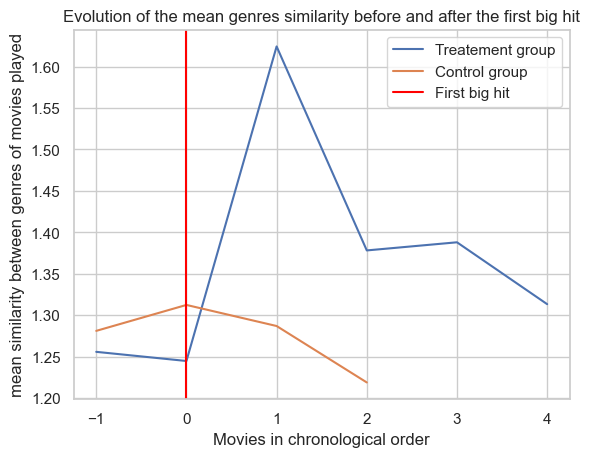

In [45]:
plt.plot(to_plot_treat, label = 'Treatement group')
plt.plot(to_plot_ctrl, label = 'Control group')
#plt.plot(to_plot+std, color='green')
#plt.plot(to_plot-std, color='green')
plt.axvline(0, color='red', label='First big hit')
plt.title('Evolution of the mean genres similarity before and after the first big hit')
plt.xlabel('Movies in chronological order')
plt.ylabel('mean similarity between genres of movies played')
plt.legend()

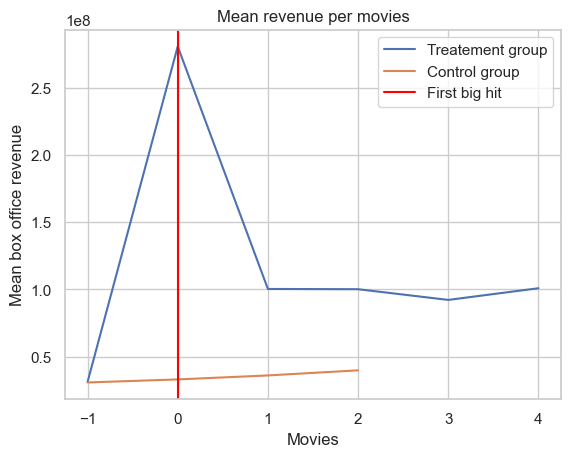

In [46]:
to_plot_treat = treat.groupby('n')['revenue'].mean()
to_plot_ctrl = ctrl.groupby('n')['revenue'].mean()

std_treat = treat.groupby('n')['revenue'].std()
std_ctrl = ctrl.groupby('n')['revenue'].std()

to_plot_treat = to_plot_treat[to_plot_indexes_treat]
to_plot_ctrl = to_plot_ctrl[to_plot_indexes_ctrl]
plt.plot(to_plot_treat, label = 'Treatement group')
plt.plot(to_plot_ctrl, label = 'Control group')

plt.axvline(x=0, color='red', label = 'First big hit')
plt.title('Mean revenue per movies')
plt.xlabel('Movies')
plt.ylabel('Mean box office revenue')
plt.legend()
plt.show()